In [23]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [24]:
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-10-01')
stock_data.head(10)


/tmp/ipython-input-1144506595.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2024-01-01', end='2024-10-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2024-01-04,180.587555,181.758969,179.565044,180.825800,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62379700
2024-01-08,184.210968,184.250686,180.180487,180.766194,59144500
2024-01-09,183.794052,183.803974,181.401569,182.582920,42841800
2024-01-10,184.836426,185.044891,182.582924,183.009806,46792900
2024-01-11,184.240784,185.690176,182.285104,185.183874,49128400


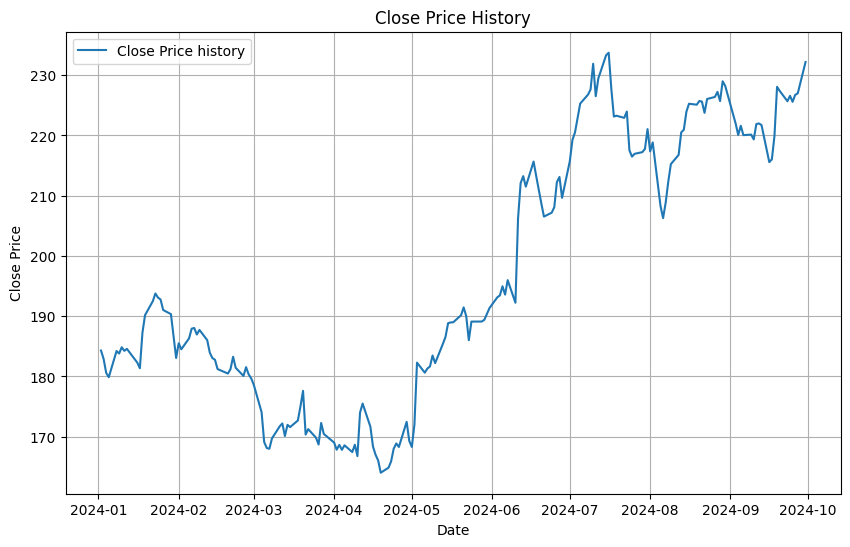

In [25]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## SARIMA (Seasonal Auto Regressive Integrated Moving Average) Model

In [26]:
## making the data stationary before model fitting
apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data  = apple_price_stationary[:-30],  apple_price_stationary[-30:]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


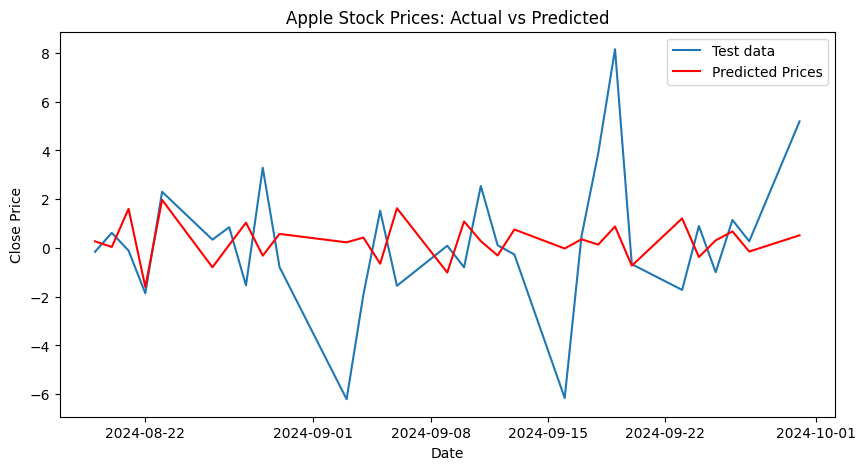

RMSE:  2.82


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 7, 1, 7
P, D, Q, s = 1,1,1,15 ##experiment

## fitting the SARIMA Model (SARIMA) to the training data
model = SARIMAX(train_data, order=(7,1,7))  ## this is the Seasonal AutoRegressive Integrated Moving Average SARIMA (model) with p = 7, d = 1 and q = 7...that's how we define Seasonal Auto Regressive Integrated Moving Average model using SARIMAX  ,,, d = 1 will take difference again.
model_fit = model.fit()

## make predications on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False
)


## plotting the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)



### rmse: is low

-  end here!